In [239]:
from bs4 import BeautifulSoup
import requests
from api import baidu_api, gaode_api
import json
url1 = 'https://movie.douban.com/subject/26931786/?from=showing'
url2 = 'https://dt.8684.cn/bj_x_6c955cb5'
url3 = 'https://dt.8684.cn/bj'
r = requests.get(url3)
r.encoding = 'utf-8'

In [56]:
soup2 = BeautifulSoup(r.text)

In [69]:
import re
metro_map = {}
for link in soup2.find_all(class_ = "sLink"):
#     print(link)
#     print(dir(link))
#     print(type(link.text))
    a = link.text.split()
    metro_map[a[0]] = a[1:]
#     print(type(link))
#     print(link.get('href'))

In [90]:
len(metro_map)
metro_map['北京地铁1号线']

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东']

In [98]:
metro_map['北京地铁4号线']

['安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '新宫',
 '西红门',
 '高米店北',
 '高米店南',
 '枣园',
 '清源路',
 '黄村西大街',
 '黄村火车站',
 '义和庄',
 '生物医药基地',
 '天宫院']

In [75]:
private_api = api

## 百度地图API：`http://api.map.baidu.com/geocoding/v3/?address=北京市海淀区上地十街10号&output=json&ak=您的ak&callback=showLocation`
### 不好用，返回的经纬度误差巨大

In [196]:
def get_geoinfo_baidu(address):
    url = 'http://api.map.baidu.com/geocoding/v3/?'
    api = private_api
    uri = url + 'address=' + address + '&output=json&ak=' + api
    r = requests.get(uri)
    result = json.loads(r.text)['result']['location']
    if result:
        return result['lat'], result['lng']
    return None

## 高德API: `https://restapi.amap.com/v3/geocode/geo?address=北京市朝阳区阜通东大街6号&output=XML&key=<用户的key>`

In [244]:
def get_geoinfo_gaode(address):
    output_type = json
    uri = f"https://restapi.amap.com/v3/geocode/geo?address={address}&output={output_type}&key={gaode_api}"
    r = requests.get(uri).text
    result = json.loads(r)['geocodes'][0]['location']
    lng, lat = result.split(',')
    return float(lat), float(lng)

In [245]:
get_geoinfo_gaode('北京地铁4号线角门西')

(39.846306, 116.37088)

In [250]:
# not precise result
get_geoinfo_baidu('北京地铁4号线生物医药基地')

(39.87451642487908, 116.46144831226533)

In [246]:
get_geoinfo_gaode('北京地铁4号线生物医药基地')

(39.686101, 116.321909)

In [247]:
get_geoinfo_baidu('北京地铁1号线四惠')

(39.91166587774982, 116.51463108233885)

In [249]:
get_geoinfo_gaode('北京地铁1号线四惠')

(39.91029, 116.49567)

In [256]:
metro_4 = {}
for x in metro_map['北京地铁4号线']:
    metro_4[x] = get_geoinfo_gaode('北京地铁4号线' + x)
metro_4

{'安河桥北': (40.011784, 116.270362),
 '北宫门': (40.003081, 116.277306),
 '西苑': (39.90403, 116.407526),
 '圆明园': (39.998969, 116.308018),
 '北京大学东门': (39.990383, 116.312899),
 '中关村': (39.98499, 116.318038),
 '海淀黄庄': (39.975996, 116.317564),
 '人民大学': (39.96677, 116.327565),
 '魏公村': (39.956708, 116.323762),
 '国家图书馆': (39.943154, 116.324024),
 '动物园': (39.941344, 116.339892),
 '西直门': (39.939588, 116.353714),
 '新街口': (39.944355, 116.371465),
 '平安里': (39.931828, 116.368242),
 '西四': (39.90403, 116.407526),
 '灵境胡同': (39.914815, 116.374654),
 '西单': (39.908342, 116.375121),
 '宣武门': (39.896729, 116.375877),
 '菜市口': (39.889297, 116.374425),
 '陶然亭': (39.882271, 116.38469),
 '北京南站': (39.864462, 116.379064),
 '马家堡': (39.840306, 116.376829),
 '角门西': (39.846306, 116.37088),
 '公益西桥': (39.83115, 116.369493),
 '新宫': (39.90403, 116.407526),
 '西红门': (39.789391, 116.3256),
 '高米店北': (39.84541, 116.37075),
 '高米店南': (39.759196, 116.341349),
 '枣园': (39.90403, 116.407526),
 '清源路': (39.742876, 116.337131),
 '黄村西大街': (39.7

In [283]:
import networkx as nx
station = nx.Graph()
station.add_nodes_from(list(metro_4.keys()))

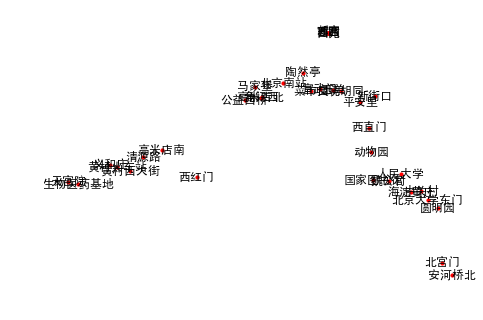

In [284]:
nx.draw(station, metro_4, with_labels = True, node_size=10)

In [285]:
x, y = [], []
for e in list(metro_4.values()):
    lat, lng = e
    x.append(lat)
    y.append(lng)

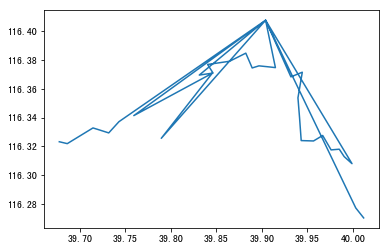

In [288]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)

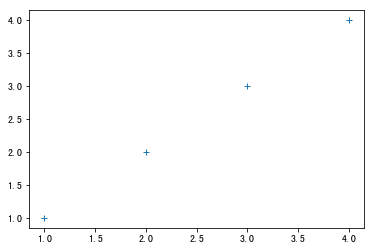

In [292]:
plt.plot([1,2,3,4],[1,2,3,4], '+')

In [259]:
# from geopy.geocoders import Nominatim
# s = Nominatim().geocode('北京地铁4号线角门西')
# 不理想

In [261]:
metro_4_connected = {}
station = list(metro_4.keys())
station

['安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '新宫',
 '西红门',
 '高米店北',
 '高米店南',
 '枣园',
 '清源路',
 '黄村西大街',
 '黄村火车站',
 '义和庄',
 '生物医药基地',
 '天宫院']